In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [116]:
##1) gender: "Male", "Female" or "Other"
##2) age: age of the patient
##3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
##4) heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
##5) evermarried: "No" or "Yes"
##6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
##7) Residencetype: "Rural" or "Urban"
##8) avgglucoselevel: average glucose level in blood
##9) bmi: body mass index
##10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
##11) stroke: 1 if the patient had a stroke or 0 if not

In [4]:
df = pd.read_csv(r'C:\Users\faron\OneDrive\Pulpit\ml projekt\full_data.csv')

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
gender_d = pd.get_dummies(df['gender'])
ever_married_d = pd.get_dummies(df['ever_married'])
work_type_d = pd.get_dummies(df['work_type'])
Residence_type_d = pd.get_dummies(df['Residence_type'])
smoking_status_d = pd.get_dummies(df['smoking_status'])

In [8]:
df_new = pd.concat([df, gender_d, ever_married_d, work_type_d, Residence_type_d, smoking_status_d],axis=1)

In [9]:
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,0,1,0,0,0,1,0,1,0,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,0,1,0,0,1,0,0,0,1,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,0,1,0,0,0,1,0,0,0,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,0,0,1,0,1,0,0,0,1,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,...,0,1,0,0,0,1,0,1,0,0


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
 11  Female             4981 non-null   uint8  
 12  Male               4981 non-null   uint8  
 13  No                 4981 non-null   uint8  
 14  Yes                4981 non-null   uint8  
 15  Govt_job           4981 non-null   uint8  
 16  Private            4981 

In [11]:
df_new.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Female               0
Male                 0
No                   0
Yes                  0
Govt_job             0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

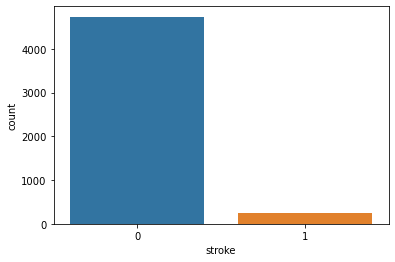

In [12]:
sns.countplot(data=df_new,x='stroke')

In [13]:
df_new['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

C:\Users\faron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\faron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\faron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\faron\anaconda3\lib\si

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

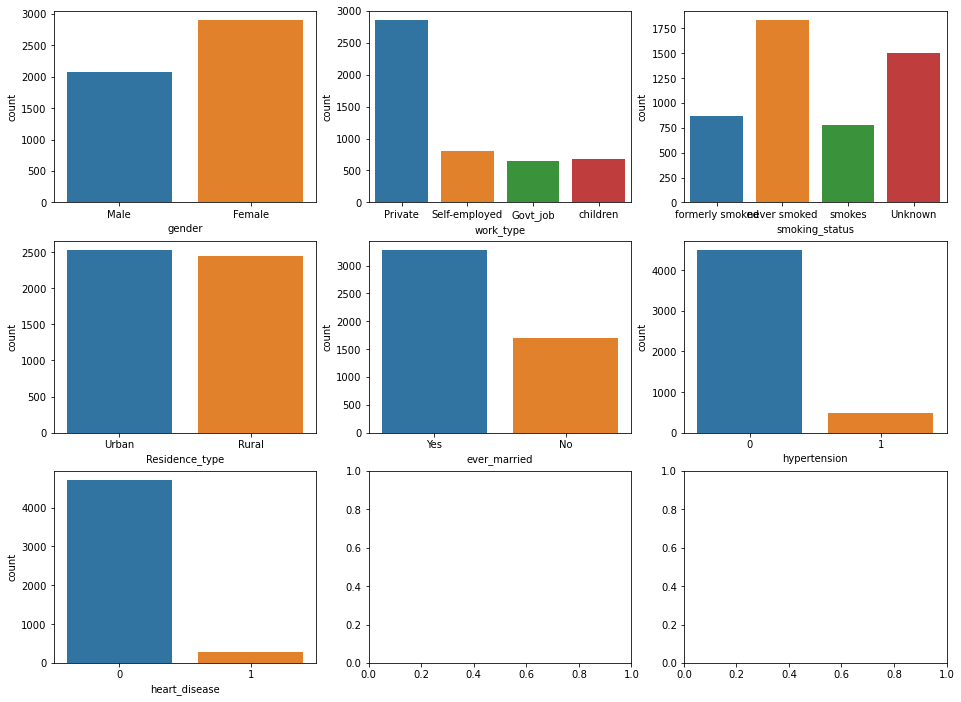

In [14]:
fig, ax = plt.subplots(3,3, figsize=(16, 12))
sns.countplot(df_new['gender'], ax=ax[0,0])
sns.countplot(df_new['work_type'], ax=ax[0,1])
sns.countplot(df_new['smoking_status'], ax=ax[0,2])
sns.countplot(df_new['Residence_type'], ax=ax[1,0])
sns.countplot(df_new['ever_married'], ax=ax[1,1])
sns.countplot(df_new['hypertension'], ax=ax[1,2])
sns.countplot(df_new['heart_disease'], ax=ax[2,0])

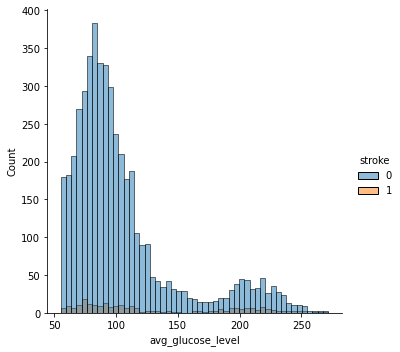

In [15]:
sns.displot(data=df_new, x='avg_glucose_level', hue='stroke')

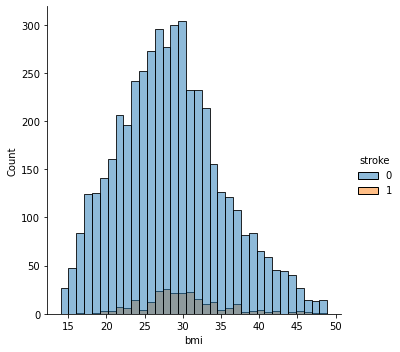

In [16]:
sns.displot(data=df_new, x='bmi', hue='stroke')

In [17]:
##sns.pairplot(df_new, hue='stroke')

In [18]:
df_newer = df_new.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)

In [19]:
df_newer.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [20]:
df_newer.drop(['Rural','No','Male','Unknown'], axis=1, inplace = True)

In [21]:
df_newer.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Yes,Govt_job,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,1,0,1,0,0,1,0,0,1
3,79.0,1,0,174.12,24.0,1,1,1,0,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,1,0,0


In [22]:
corr = df_newer.corr()

<AxesSubplot:>

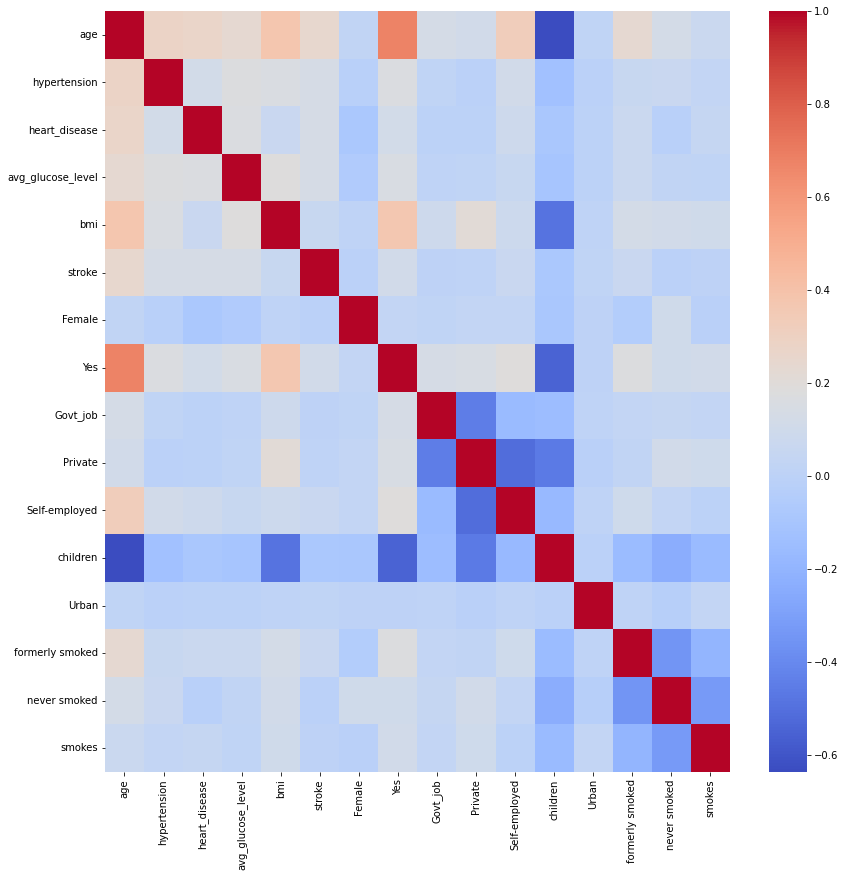

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cmap= 'coolwarm')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [25]:
X = df_newer.drop('stroke',axis=1)
y = df_newer['stroke']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test,rfc_pred))

[[1412    0]
 [  83    0]]


In [30]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1412
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.89      0.94      0.92      1495



C:\Users\faron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\faron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\faron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
dtree_pred = dtree.predict(X_test)

In [35]:
print(confusion_matrix(y_test,dtree_pred))

[[1355   57]
 [  66   17]]


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
log_pred = logmodel.predict(X_test)

In [39]:
print(confusion_matrix(y_test,log_pred))

[[1412    0]
 [  83    0]]


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors= 20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [42]:
knn_pred = knn.predict(X_test)

In [43]:
print(confusion_matrix(y_test,knn_pred))

[[1412    0]
 [  83    0]]


In [44]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

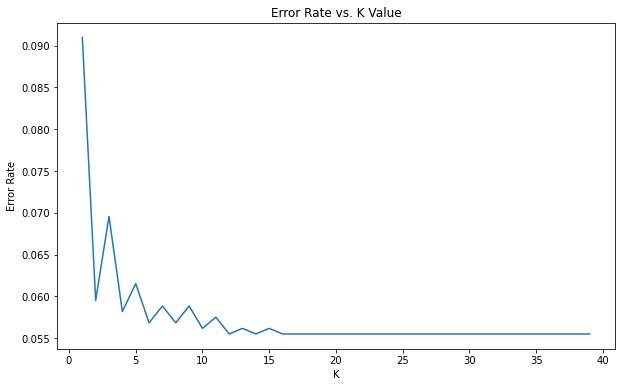

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC()

In [48]:
svc.fit(X_train,y_train)

SVC()

In [49]:
svc_pred = svc.predict(X_test)

In [50]:
print(confusion_matrix(y_test,svc_pred))

[[1412    0]
 [  83    0]]


In [51]:
pip install -U imbalanced-learn

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.combine import SMOTEENN

In [53]:
smote = SMOTEENN()

In [54]:
X_train_re,y_train_re = smote.fit_resample(X_train,y_train)

In [55]:
##scaler = StandardScaler()

In [56]:
##X_train_scale = scaler.fit_transform(X_train_re)

In [102]:
X_train_1, X_test_1 ,y_train_1 , y_test_1 = train_test_split(X_train_re,y_train_re,test_size=0.3)

In [58]:
logmodel2 = LogisticRegression()

In [59]:
logmodel2.fit(X_train_1,y_train_1)

LogisticRegression()

In [60]:
log_pred_2 = logmodel2.predict(X_test_1)

In [61]:
print(confusion_matrix(y_test_1,log_pred_2))

[[676  82]
 [ 63 850]]


In [62]:
svc2 = SVC()

In [63]:
svc2.fit(X_train_1,y_train_1)

SVC()

In [64]:
svc_pred_2 = svc2.predict(X_test_1)

In [65]:
print(confusion_matrix(y_test_1,svc_pred_2))

[[694  64]
 [ 39 874]]


In [66]:
print(classification_report(y_test_1,svc_pred_2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       758
           1       0.93      0.96      0.94       913

    accuracy                           0.94      1671
   macro avg       0.94      0.94      0.94      1671
weighted avg       0.94      0.94      0.94      1671



In [103]:
rfc_2 = RandomForestClassifier(n_estimators=200)

In [104]:
rfc_2.fit(X_train_1, y_train_1)

RandomForestClassifier(n_estimators=200)

In [105]:
rfc_pred_2 = rfc_2.predict(X_test_1)

In [106]:
print(confusion_matrix(y_test_1,rfc_pred_2))

[[724  29]
 [ 19 899]]


In [107]:
print(classification_report(y_test_1,rfc_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       753
           1       0.97      0.98      0.97       918

    accuracy                           0.97      1671
   macro avg       0.97      0.97      0.97      1671
weighted avg       0.97      0.97      0.97      1671



In [108]:
scaler.fit(df_newer)

StandardScaler()

In [109]:
##scaled_data = scaler.transform(df_newer)
df_scaled = pd.DataFrame(scaler.transform(df_newer), columns=df_newer.columns, index=df_newer.index)

In [82]:
from sklearn import preprocessing
from sklearn import utils

In [74]:
X_S = df_scaled.drop('stroke',axis=1)
y_S = df_scaled['stroke']

In [83]:
lab = preprocessing.LabelEncoder()
y_S_transformed = lab.fit_transform(y_S)

In [84]:
X_train_S, X_test_S ,y_train_S , y_test_S = train_test_split(X_S,y_S_transformed,test_size=0.3)

In [85]:
rfc_3 = RandomForestClassifier(n_estimators=200)

In [86]:
rfc_3.fit(X_train_S, y_train_S)

RandomForestClassifier(n_estimators=200)

In [88]:
rfc_pred_3 = rfc_3.predict(X_test_S)

In [89]:
print(confusion_matrix(y_test_S,rfc_pred_3))

[[1404    1]
 [  90    0]]


In [90]:
from imblearn.over_sampling import RandomOverSampler

In [91]:
oversamp = RandomOverSampler(random_state=1)

In [92]:
X_over, y_over = oversamp.fit_resample(X, y)

In [93]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.3)

In [94]:
rfc_o = RandomForestClassifier(n_estimators=200)

In [95]:
rfc_o.fit(X_train_o, y_train_o)

RandomForestClassifier(n_estimators=200)

In [96]:
rfc_pred_o = rfc_o.predict(X_test_o)

In [97]:
print(confusion_matrix(y_test_o,rfc_pred_o))

[[1406   26]
 [   0 1408]]


In [98]:
rfc_pred_o1=rfc_o.predict(X_test)

In [99]:
print(confusion_matrix(y_test,rfc_pred_o1))

[[1402   10]
 [   0   83]]


In [110]:
rfc_pred_22=rfc_2.predict(X_test)

In [111]:
print(confusion_matrix(y_test,rfc_pred_22))

[[1258  154]
 [  51   32]]
